# Rad Lab

LND 7317 Geiger-Müller tube simulations

© 2025 by Gissio

## Settings

In [1]:
detector_geometry = "data/geometry.toml"
detector_label = "LND 7317"
N_montecarlo = 1000000

## Detector geometry

![J305 Geometry](data/geometry.png)

In [2]:
import sys
if '../../tools' not in sys.path:
    sys.path.append('../../tools')

import radlab

# %matplotlib widget

source_area = radlab.get_source_area(detector_geometry)
energies, efficiencies = radlab.simulate_gm_energies(
    detector_geometry, N_montecarlo)
angles, angular_response = radlab.simulate_gm_angles(
    detector_geometry, N_montecarlo)

## Detector efficiency

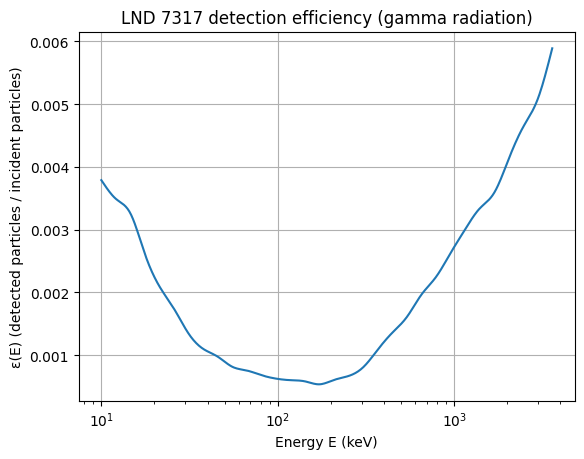

In [3]:
radlab.plot_semilogx(f'{detector_label} detection efficiency (gamma radiation)',
                     energies, efficiencies, "ε(E) (detected particles / incident particles)")

## Ambient dose equivalent sensitivity

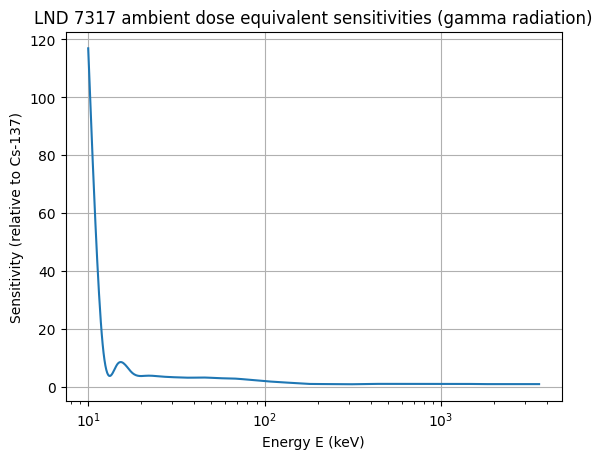

In [4]:
ambient_dose_equivalent_sensitivities = radlab.calculate_ambient_dose_equivalent_sensitivities(
    energies, efficiencies, source_area)

radlab.plot_semilogx(f'{detector_label} ambient dose equivalent sensitivities (gamma radiation)',
                     energies, ambient_dose_equivalent_sensitivities, "Sensitivity (relative to Cs-137)", normalize_cs137=True)

## Angular response

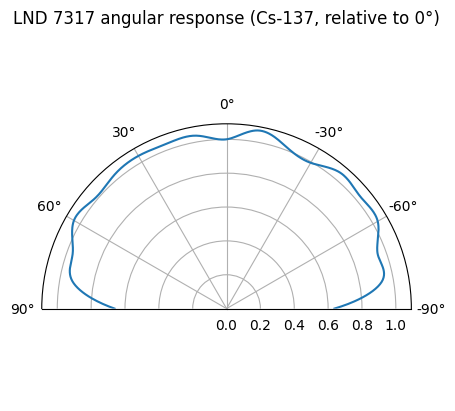

In [5]:
radlab.plot_polar(
    f'{detector_label} angular response (Cs-137, relative to 0°)', angles, angular_response)

## Sensitivity for various sources

In [6]:
source_sensitivities = radlab.calculate_source_sensitivities(
    energies, ambient_dose_equivalent_sensitivities)

radlab.print_source_sensitivities(source_sensitivities)

| Source | Sensitivity (cpm/µSv/h) | Relative sensitivity (Cs-137) |
|-|-|-|
| Cs-137 | 150.998 | 1.000 |
| Co-60 | 147.696 | 0.978 |
| Tc-99m | 286.005 | 1.894 |
| I-131 | 141.493 | 0.937 |
| Lu-177 | 165.862 | 1.098 |
| Am-241 | 440.106 | 2.915 |
| Radium | 142.730 | 0.945 |
| Uranium ore | 149.846 | 0.992 |
| Uranium glaze | 156.436 | 1.036 |
| Depleted uranium | 156.139 | 1.034 |
| Thorium ore | 142.001 | 0.940 |
| X-ray tube (60 kV) | 482.139 | 3.193 |
| K-40 | 142.507 | 0.944 |
| Natural background | 295.328 | 1.956 |
